<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


## Load and Prepare Data

In [4]:
data=pd.read_csv('train.csv')

## EDA

In [6]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [10]:
data.shape

(10886, 12)

In [12]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [18]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Data Preprocessing

In [21]:
data.isnull().sum()
#data has no missing value

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [23]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [25]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

## Strorytelling - Visualization

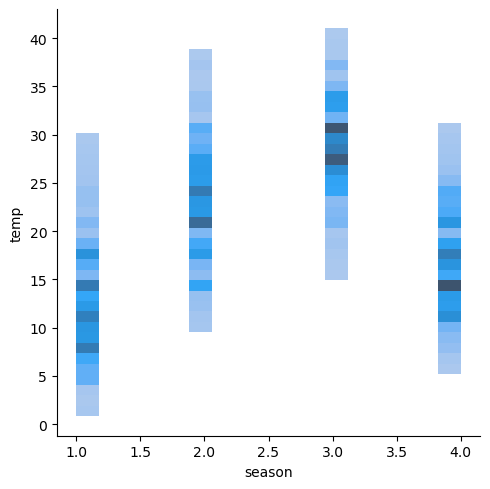

In [28]:
sns.displot(data,x='season',y='temp')

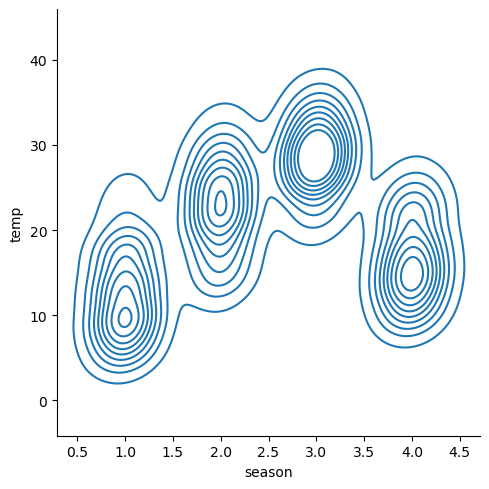

In [30]:
sns.displot(data,x='season',y='temp',kind='kde')

C:\Users\Tarasheh\AppData\Local\Temp\ipykernel_13688\3247494392.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(data,x='season',y='temp',kind='kde',hue='weather')


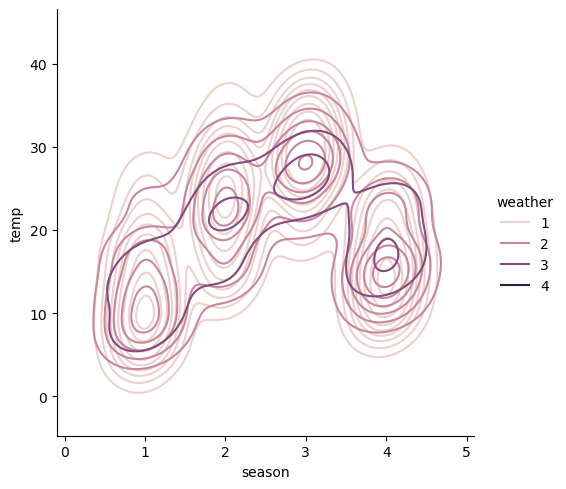

In [32]:
sns.displot(data,x='season',y='temp',kind='kde',hue='weather')

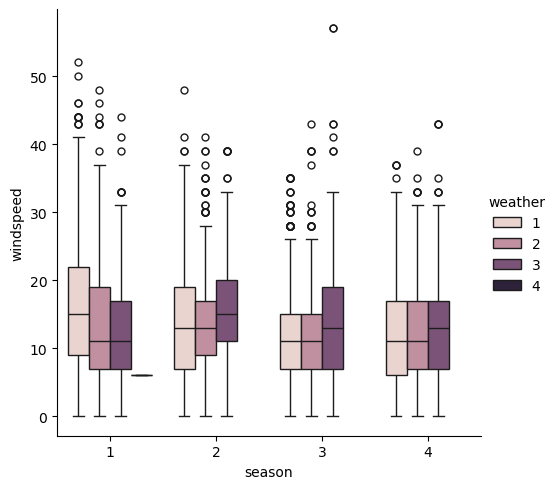

In [33]:
sns.catplot(data=data,y='windspeed',x='season',hue='weather',kind='box')

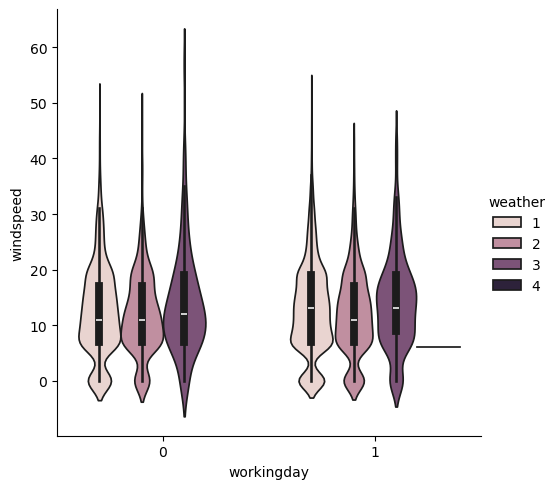

In [34]:
sns.catplot(data=data,y='windspeed',x='workingday',hue='weather',kind='violin')

In [35]:
data.drop('datetime',axis=1,inplace=True)

<Axes: >

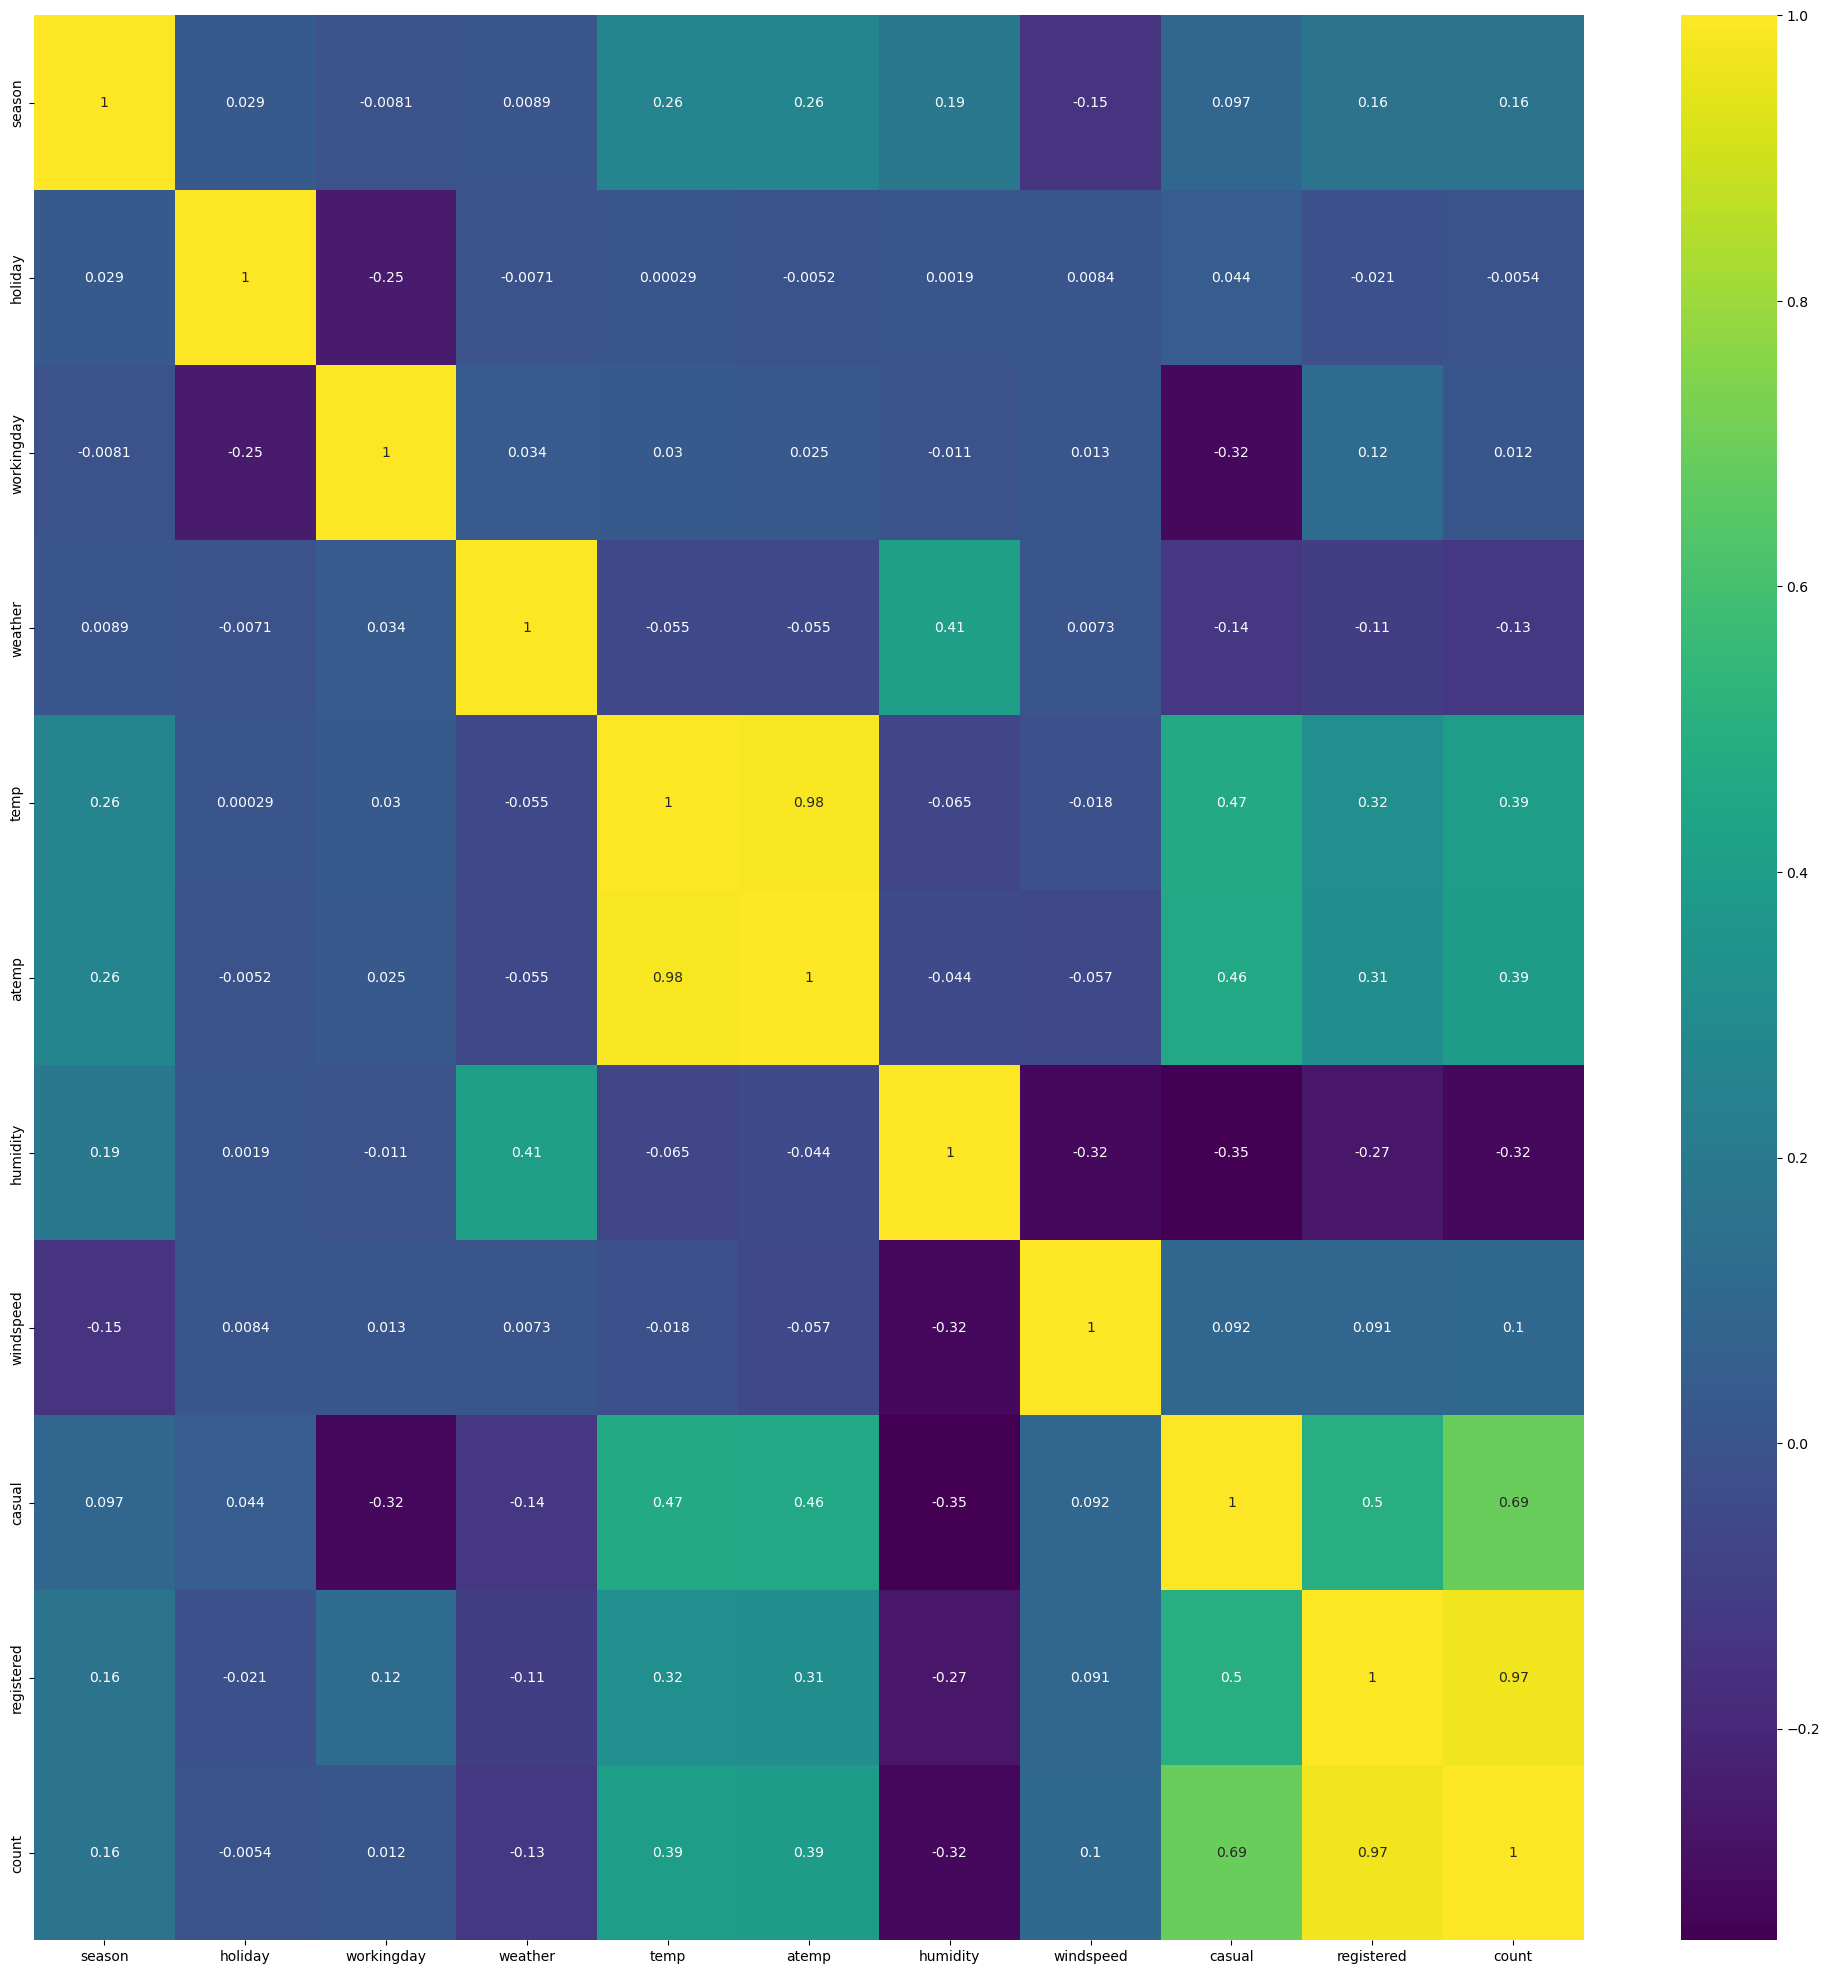

In [42]:
corr=data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='viridis')

## Train your model (Regression)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
X=data[[ 'registered']]
Y=data[['count']]

In [49]:
X

,registered
0,13
1,32
2,27
3,10
4,1
...,...
10881,329
10882,231
10883,164
10884,117


In [51]:
Y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [53]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=4)

In [55]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [57]:
predict=regressor.predict(X_test)

In [59]:
regressor.intercept_

array([10.44096346])

In [61]:
regressor.coef_

array([[1.16333913]])

In [63]:
X_test

,registered
3039,162
7091,242
10193,11
8986,558
5856,19
...,...
9087,72
708,39
2406,6
9051,186


In [65]:
predict

array([[198.90190318],
       [291.96903391],
       [ 23.23769393],
       ...,
       [ 17.42099826],
       [226.8220424 ],
       [382.70948637]])

In [67]:
Y_test

,count
3039,247
7091,286
10193,20
8986,677
5856,19
...,...
9087,99
708,40
2406,6
9051,298


<Axes: ylabel='Count'>

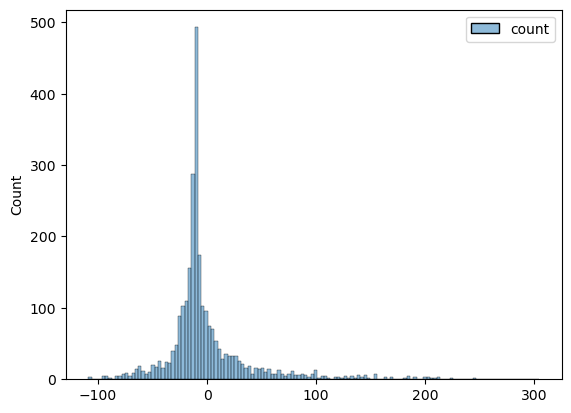

In [69]:
sns.histplot(Y_test-predict)

In [71]:
print('MAE:', metrics.mean_absolute_error(Y_test, predict))  
print('MSE:', metrics.mean_squared_error(Y_test, predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

MAE: 26.923772635061574
MSE: 1975.952603753716
RMSE: 44.451688424105065


In [78]:
X

,registered
0,13
1,32
2,27
3,10
4,1
...,...
10881,329
10882,231
10883,164
10884,117


In [152]:
X=data[['temp','atemp','humidity','windspeed','casual','registered']]
Y=data[['count']]

In [154]:
X

,temp,atemp,humidity,windspeed,casual,registered
0,9.84,14.395,81,0.0000,3,13
1,9.02,13.635,80,0.0000,8,32
2,9.02,13.635,80,0.0000,5,27
3,9.84,14.395,75,0.0000,3,10
4,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329
10882,14.76,17.425,57,15.0013,10,231
10883,13.94,15.910,61,15.0013,4,164
10884,13.94,17.425,61,6.0032,12,117


In [156]:
Y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

In [160]:
mlr=LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [162]:
mlr.intercept_

array([-2.84217094e-13])

In [164]:
c=mlr.coef_
c

array([[-2.85689553e-15,  6.58008186e-15,  1.59176581e-15,
         1.96567181e-16,  1.00000000e+00,  1.00000000e+00]])

In [166]:
Y_train

,count
5083,176
1468,13
3999,305
1567,13
6116,26
...,...
6017,46
709,51
10679,334
8366,131


In [176]:
y_pred=mlr.predict(X_train)
y_pred

array([[176.],
       [ 13.],
       [305.],
       ...,
       [334.],
       [131.],
       [ 99.]])

In [178]:
print('R^2:',metrics.r2_score(Y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 1.0
MAE: 7.857039603358653e-14
MSE: 1.2331759865424369e-26
RMSE: 1.1104845728520666e-13


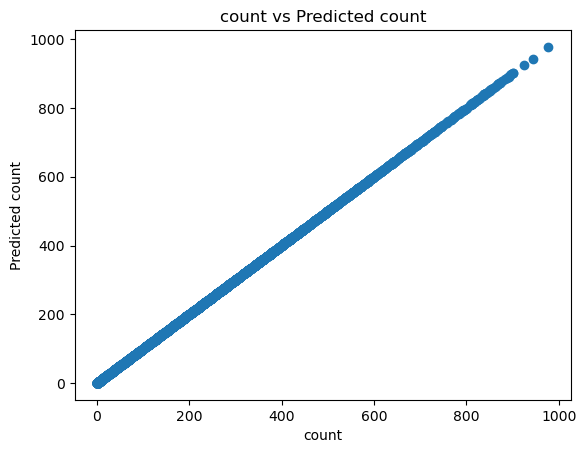

In [110]:
plt.scatter(Y_train, Y_test)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

In [114]:
from sklearn.linear_model import LogisticRegression

In [180]:
X=data[['temp','atemp','humidity','windspeed','casual','registered']]
y=data[['count']]

In [182]:
X

,temp,atemp,humidity,windspeed,casual,registered
0,9.84,14.395,81,0.0000,3,13
1,9.02,13.635,80,0.0000,8,32
2,9.02,13.635,80,0.0000,5,27
3,9.84,14.395,75,0.0000,3,10
4,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329
10882,14.76,17.425,57,15.0013,10,231
10883,13.94,15.910,61,15.0013,4,164
10884,13.94,17.425,61,6.0032,12,117


In [184]:
y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [260]:
log=LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Tarasheh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tarasheh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [261]:
y_pred=log.predict(X_train)

In [262]:
X_train

,temp,atemp,humidity,windspeed,casual,registered
3667,29.52,34.090,70,15.0013,170,201
10402,14.76,17.425,66,11.0014,9,120
10312,10.66,12.880,70,11.0014,0,7
10519,21.32,25.000,59,15.0013,43,700
6044,10.66,15.150,65,0.0000,0,1
...,...,...,...,...,...,...
3046,28.70,32.575,51,15.0013,92,251
9917,22.96,26.515,43,11.0014,82,188
4079,14.76,16.665,93,19.9995,4,43
2254,30.34,35.605,79,16.9979,23,233


In [263]:
y_pred

array([349, 126,   7, ...,  33, 171, 142], dtype=int64)

In [268]:
y_train

,count
3667,371
10402,129
10312,7
10519,743
6044,1
...,...
3046,343
9917,270
4079,47
2254,256


In [270]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_train, y_pred)))

The accuracy of Logistic Regression is:  0.0646981627296588


## Test Result

## Send us the Result (Maktabkhoone)